Tutorial on YouTube Chanel:
Text Visualization | Lecture 2 | CPE 393 Text Analytics
https://www.youtube.com/watch?v=rAQCQKnkNh0&t=774s

##### <b>Load Dataset</b>

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [6]:
df = pd.read_csv('un-general-debates.csv')
df.sample(5)

session  year country                                               text
5799       32  1977     HTI  ﻿313.\t Mr. President, I have the honour on be...
6573       28  1973     IRN  ﻿164.\tThe election to the high office of Pres...
2163       43  1988     IRL  ﻿\nI should like first to offer Mr. Dante Capu...
142        44  1989     PAN  ﻿\nMr. President, on behalf of the delegation ...
4417       58  2003     BRN  ﻿My congratulations go to you, Sir, and to the...

In [5]:
df.count()

session    7507
year       7507
country    7507
text       7507
dtype: int64

In [8]:
# Primary key

df[['session', 'country']].drop_duplicates().count()

session    7507
country    7507
dtype: int64

##### <b>DataFrame Summary Statistics</b>

In [10]:
df['length'] = df['text'].str.len()

In [11]:
df.columns

Index(['session', 'year', 'country', 'text', 'length'], dtype='object')

In [13]:
df.dtypes

session     int64
year        int64
country    object
text       object
length      int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
 4   length   7507 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 293.4+ KB


In [15]:
df.describe().T

count          mean          std     min      25%      50%      75%  \
session  7507.0     49.610763    12.892155    25.0     39.0     51.0     61.0   
year     7507.0   1994.610763    12.892155  1970.0   1984.0   1996.0   2006.0   
length   7507.0  17967.281604  7860.038463  2362.0  12077.0  16424.0  22479.5   

             max  
session     70.0  
year      2015.0  
length   72041.0

In [19]:
df[['country']].describe(include='O').T

count unique  top freq
country  7507    199  IRN   46

##### <b>Check Missing Data</b>

In [20]:
df.isna().sum()

session    0
year       0
country    0
text       0
length     0
dtype: int64

##### <b>Plotting distribution</b>

<AxesSubplot:>

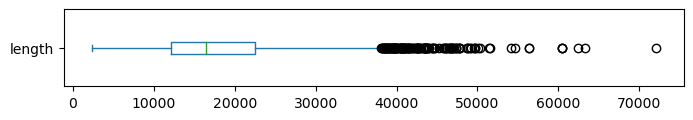

In [27]:
df['length'].plot(kind='box', vert=False, figsize=(8,1))

AttributeError: 'Rectangle' object has no property 'bin'

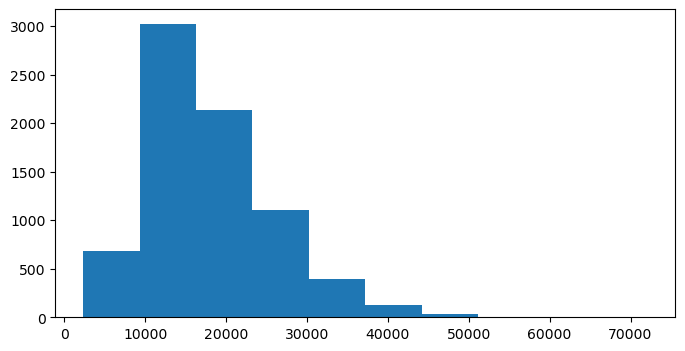

In [29]:
df['length'].plot(kind='hist', bin=30, figsize=(8,4), edgecolor='k')

##### <b>Distribution across categories</b>

c:\Users\samapant\Anaconda3\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


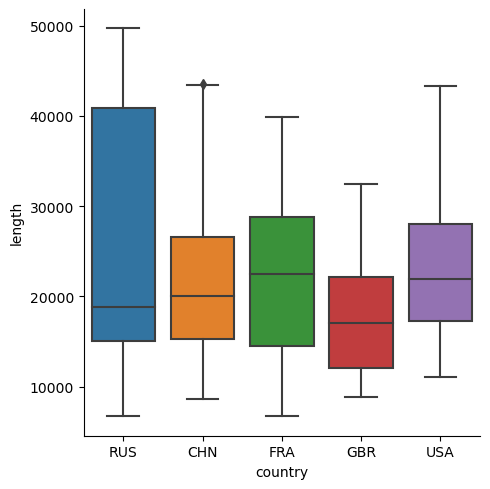

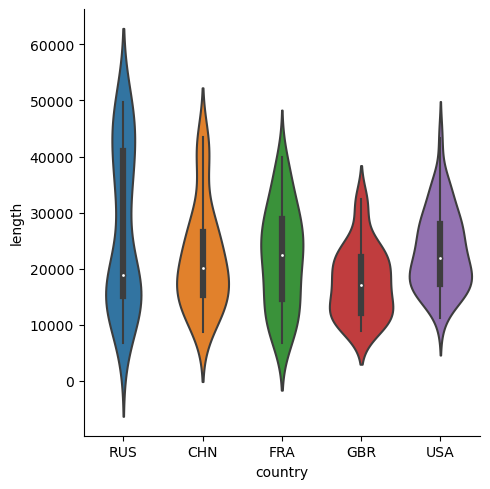

In [30]:
import seaborn as sns

where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin')

##### <b>Developement over time Number of countries</b>

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

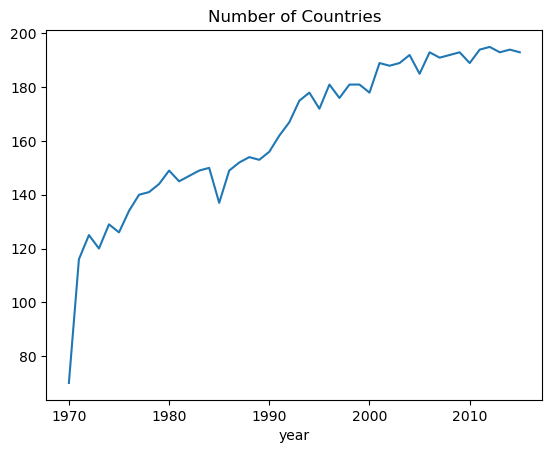

In [31]:
df.groupby('year').size().plot(title='Number of Countries')

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

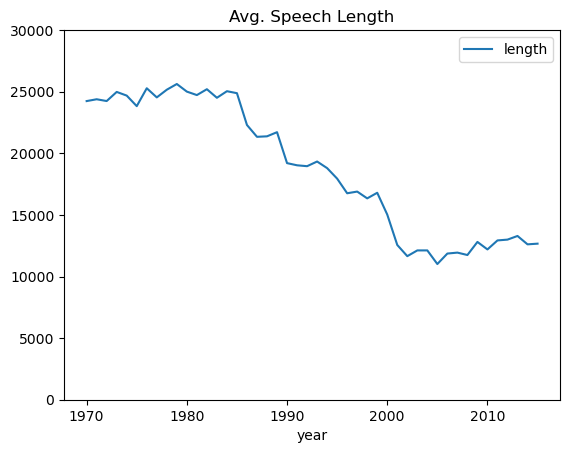

In [33]:
df.groupby('year').agg({'length':'mean'}).plot(title='Avg. Speech Length', ylim=(0,30000))

##### <b>Simple Text Processing</b>

In [35]:
# Case Folding
str.lower('Hello World')

'hello world'

In [36]:
# Tokenization

import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [37]:
text = "Let's defeat SARS-Coc-2 together in 2021!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-Coc-2|together|in


In [44]:
# Stop word removal
import nltk
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samapant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [46]:
remove_stop(tokens)

['Let', 'defeat', 'SARS-Coc-2', 'together']

In [47]:
# Processing a pipeline

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [49]:
prepare(text, pipeline)

['let', 'defeat', 'sars-coc-2', 'together']